# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression/Modelling libraries
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# API
import requests
import json
import time
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


# Plots to show relationship between Latitude and various weather variables
---
## Create DataFrame using API calls

In [9]:
units = "metric"
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# init list
rows = []

for city in cities:
    try:
        # Step 1:
        url = base_url + city
        
        # Step 2:
        response = requests.get(url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            data = response.json()
        else:
            data = {} # failed request
        
         # Step 5: extract
        coord = data.get("coord", {}) # if the "coord" doesn't exist, it will return an empty dictionary, otherwise, get the desired value
        main = data.get("main", {}) # same logic as with coord; using this throughout
        
        lat = coord.get("lat") 
        lon = coord.get("lon")
        temp_max = main.get("temp_max")
        pressure = main.get("pressure")
        humidity = main.get("humidity")
        wind_speed = data.get("wind", {}).get("speed")
        country = data.get("sys", {}).get("country")
        cloudiness = data.get("clouds", {}).get("all")
        
        # create row
        row = {
            "city": city,
            "latitude": lat,
            "logitude": lon,
            "max_temperature": temp_max,
            "pressure": pressure,
            "humidity": humidity,
            "wind_speed": wind_speed,
            "cloudiness": cloudiness,
            "country": country
        }

        rows.append(row)
    except Exception as e:
        print(f"{city} failed to get weather data :(")
        print(e)
        pass

    time.sleep(1) # Making it so only the code makes 1 API call a second

# make dataframe
df = pd.DataFrame(rows)
df.head()

waitangi succeeded!
cabo san lucas succeeded!
puerto san carlos succeeded!
marka succeeded!
port-aux-francais succeeded!
petropavlivka succeeded!
stanley succeeded!
albany succeeded!
mejit succeeded!
isafjordur succeeded!
grytviken succeeded!
tsiombe succeeded!
lozuvatka succeeded!
mount isa succeeded!
tarauaca succeeded!
moyale succeeded!
thunder bay succeeded!
touros succeeded!
hamilton succeeded!
chilaw succeeded!
correntina succeeded!
wailua homesteads succeeded!
saipan succeeded!
tazovsky succeeded!
sitka succeeded!
howrah succeeded!
kovdor succeeded!
adamstown succeeded!
thompson succeeded!
tralee succeeded!
kikwit succeeded!
east london succeeded!
taiohae succeeded!
tondano succeeded!
saint-pierre succeeded!
dhanera succeeded!
aasiaat succeeded!
aransas pass succeeded!
new norfolk succeeded!
constantia succeeded!
blackmans bay succeeded!
ushuaia succeeded!
karratha succeeded!
tolanaro succeeded!
waajid succeeded!
port mathurin succeeded!
avarua succeeded!
happy valley-goose bay 

,city,latitude,logitude,temperature,pressure,humidity,wind_speed,cloudiness,country
0,waitangi,-43.9535,-176.5597,8.79,1000.0,89.0,0.45,82.0,NZ
1,cabo san lucas,22.8909,-109.9124,28.99,1011.0,43.0,3.53,100.0,MX
2,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,marka,1.7159,44.7717,26.34,1013.0,86.0,6.47,96.0,SO
4,port-aux-francais,-49.3500,70.2167,2.60,996.0,75.0,13.51,87.0,TF


In [17]:
# Saving DataFrame off to a csv
df.to_csv("weather_data_Marta.csv", index=False)

## Clean Data

In [21]:
# Read saved data
raw_df = pd.read_csv("weather_data_Marta.csv")

display(raw_df.head())
raw_df.info()

,Unnamed: 0,city,latitude,logitude,temperature,pressure,humidity,wind_speed,cloudiness,country
0,0,waitangi,-43.9535,-176.5597,8.79,1000.0,89.0,0.45,82.0,NZ
1,1,cabo san lucas,22.8909,-109.9124,28.99,1011.0,43.0,3.53,100.0,MX
2,2,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,marka,1.7159,44.7717,26.34,1013.0,86.0,6.47,96.0,SO
4,4,port-aux-francais,-49.3500,70.2167,2.60,996.0,75.0,13.51,87.0,TF


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   595 non-null    int64  
 1   city         595 non-null    object 
 2   latitude     569 non-null    float64
 3   logitude     569 non-null    float64
 4   temperature  569 non-null    float64
 5   pressure     569 non-null    float64
 6   humidity     569 non-null    float64
 7   wind_speed   569 non-null    float64
 8   cloudiness   569 non-null    float64
 9   country      563 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 46.6+ KB


In [23]:
# Delete rows with null values
df = raw_df.dropna()

## Scatter Plots of Latitude v. Weather Variables

### Latitude v. Temperature

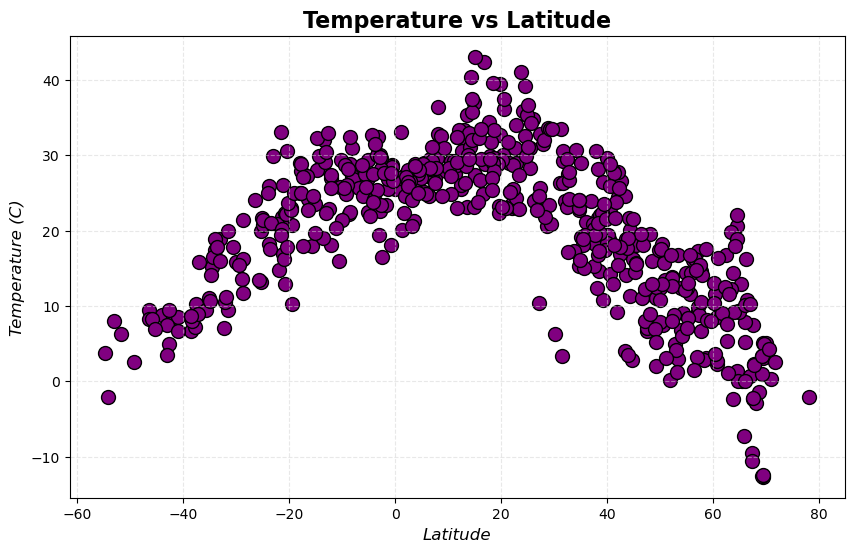

In [48]:
# scatter latitude vs temperature (current)

# Step 1: Get the Data
x = df.latitude
y = df.temperature

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="purple", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (C)", fontsize=12, fontstyle="italic")
plt.title("Temperature vs Latitude", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

### Latitude v. Humidity

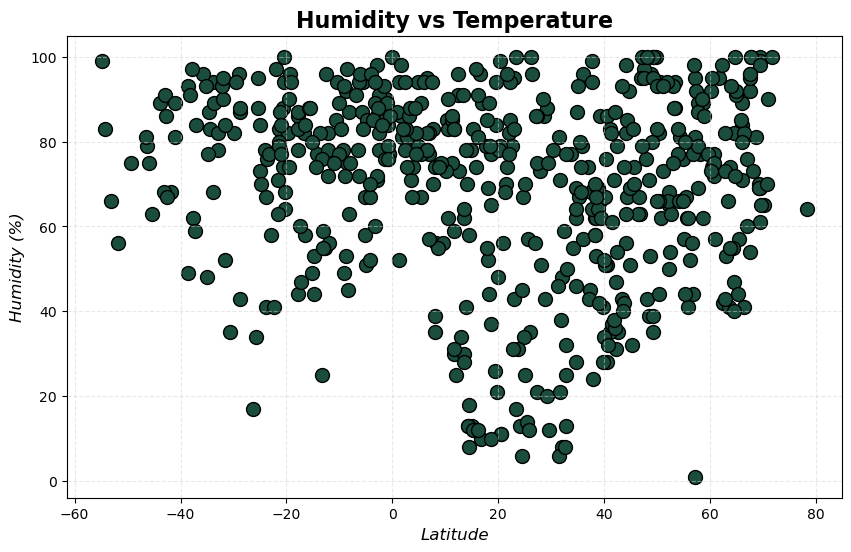

In [46]:
# scatter latitude vs humidity

# Step 1: Get the Data
x = df.latitude
y = df.humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="#1B4D3E", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity (%)", fontsize=12, fontstyle="italic")
plt.title("Humidity vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

### Latitude v. Cloudiness

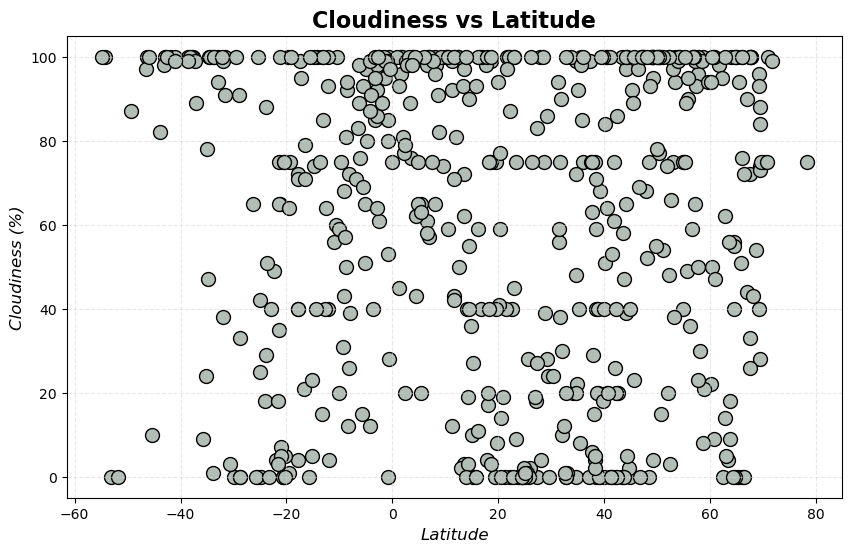

In [47]:
# scatter latitude vs cloudiness

# Step 1: Get the Data
x = df.latitude
y = df.cloudiness

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="#B2BEB5", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness (%)", fontsize=12, fontstyle="italic")
plt.title("Cloudiness vs Latitude", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

### Latitude v. Wind Speed

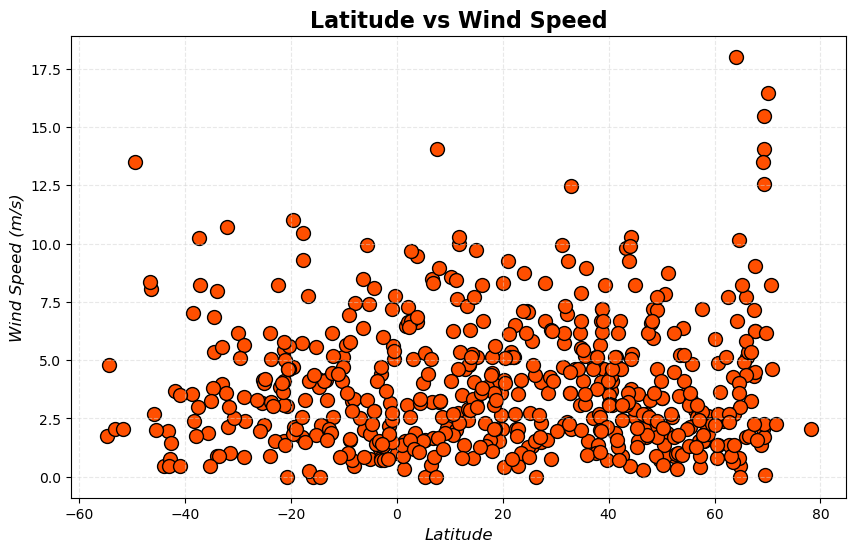

In [35]:
# scatter latitude vs wind speed

# Step 1: Get the Data
x = df.latitude
y = df.wind_speed

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="#FF4F00", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (m/s)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

## Linear Regression for each relationship by Hemisphere (North v. South)

In [81]:
# Create a Linear Regression function that takes in the x and y variables as well as variables m and b for where the line equation is placed
# Using LinRegress
def lin_regress (x_variable, y_variable, x_label, y_label, m, b):
    # Adding a description for the function
    ''' 
    6 variables are needed:
    1) x_variable: includes the DataFrame being referenced (i.e. df_north.temperature)
    2) y_variable: include the DataFrame being referenced (i.e. df_north.latitude)
    3) x_label: Label for the x-axis on the chart (please include variables if needed)
    4) y_label: Label for the y-axis on the chart (please include variables if needed)
    5) m: x-coordinate for the line equation
    6) b: y-coordinate for the line equation
    '''
    x_values = x_variable
    y_values = y_variable
    
    
    # Makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Make the canvas
    plt.figure(figsize=(10,6))
    
    # Make the basic plot
    plt.scatter(x_values,y_values, facecolor="purple", edgecolor="black", s=100)
    plt.plot(x_values,regress_values,"r-")
    
    # Customizations
    plt.title(f"{y_label} v. {x_label}", fontsize=16, fontfamily="monospace")
    plt.xlabel(x_label, fontfamily="monospace")
    plt.ylabel(y_label, fontfamily="monospace")
    
    plt.grid(color="lightgrey", linestyle="--")
    
    plt.annotate(line_eq,(m,b),fontsize=15,color="red")
    
    
    print(f"The r-value is: {rvalue}")
    plt.show()

In [52]:
# Create the Northern Hemisphere df
filt = df.latitude >= 0
df_north = df.loc[filt].reset_index()

In [53]:
# Create the Southern Hemisphere df
filt = df.latitude < 0
df_south = df.loc[filt].reset_index()

### Temperature v. Latitude Linear Regression Plot

The r-value is: -0.8070630782746769


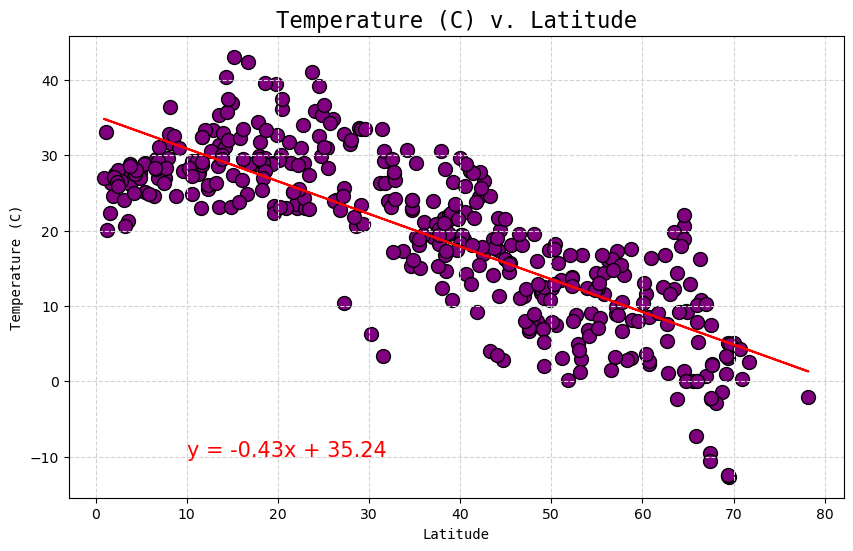

In [83]:
# Using the lin_regress function defined above; The function will be used for all plots
lin_regress(df_north.latitude, df_north.temperature, "Latitude", "Temperature (C)", 10, -10)

The r-value is: 0.8309306006436533


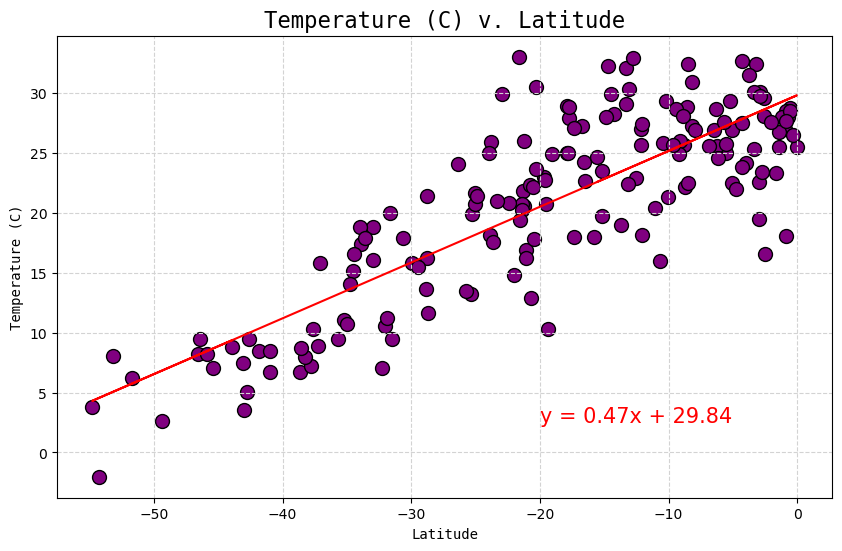

In [80]:
lin_regress(df_south.latitude, df_south.temperature, "Latitude", "Temperature (C)", -20, 2.5)

Analysis:
- Both of these charts show a strong linear correlation between Temperature and Latitude. In the Northern Hemisphere, this relationship is negative, and in the Southern Hemisphere, this relationship is positive. This relationship is consistent with general thinking that the closer to the equator (latitude of 0), that temperatures are warmest, and that temperatures decrease the further from 0 they go.

### Humidity v. Latitude Linear Regression Plot

The r-value is: 0.11246410400406055


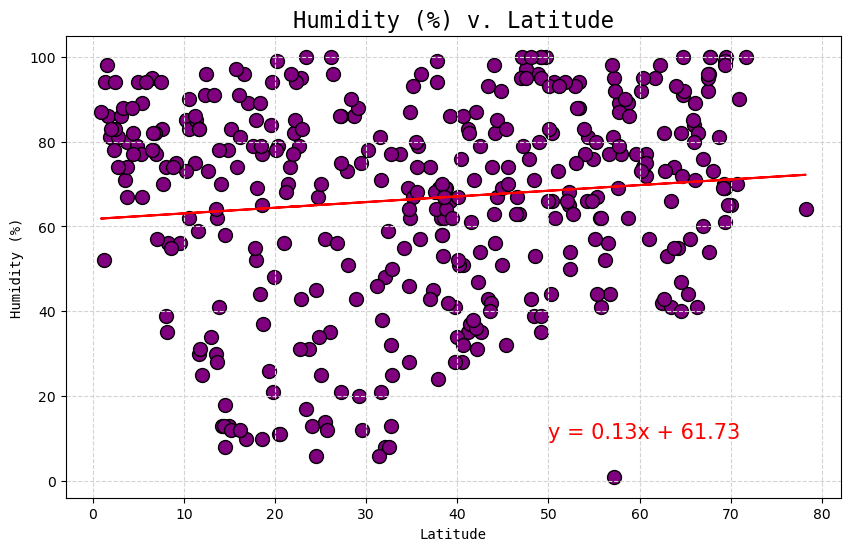

In [85]:
lin_regress(df_north.latitude, df_north.humidity, "Latitude", "Humidity (%)", 50, 10)

The r-value is: 0.03949627778668398


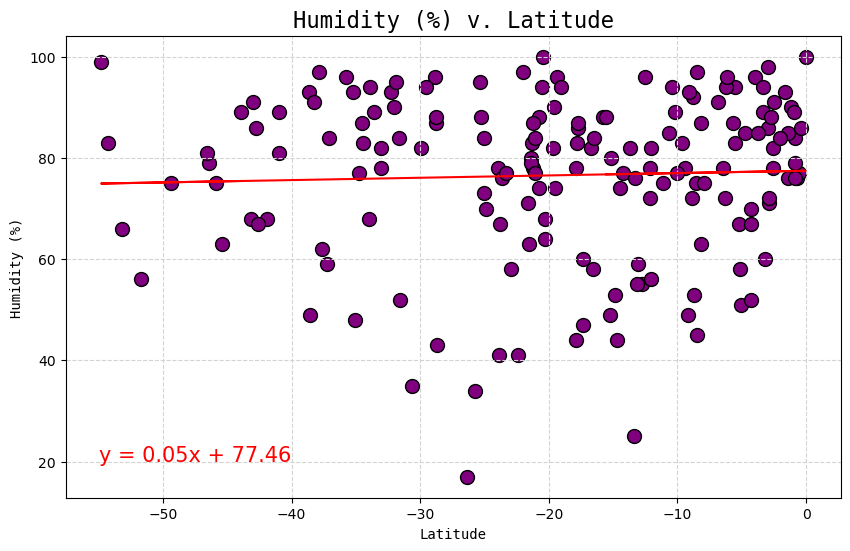

In [88]:
lin_regress(df_south.latitude, df_south.humidity, "Latitude", "Humidity (%)", -55, 20)

Analysis:
- There appears to be no linear relationship between Humidity and Latitude. This is consistent with anecdotal evidence and previous explanations of humidity. For example, Cleveland, Ohio has a higher latitude than say Pheonix, Arizona. However, humidity in Cleveland tends to be greater than in Pheonix due to geographical elements that are present or absent in each location. Cleveland has Lake Erie that increases the humidity, while Pheonix is located in a desert without many sources of water.

### Cloudiness v. Latitude Linear Regression Plot

The r-value is: 0.008076212534053299


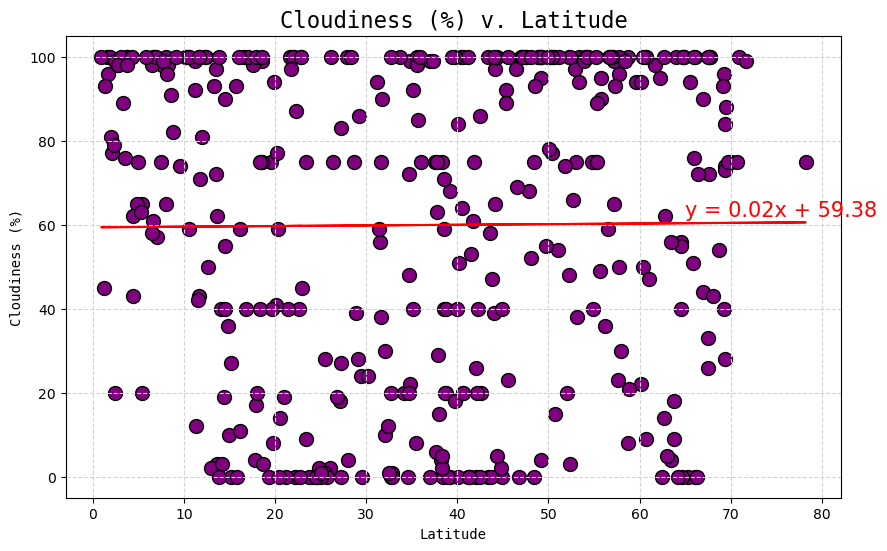

In [92]:
lin_regress(df_north.latitude, df_north.cloudiness, "Latitude", "Cloudiness (%)", 65, 62)

The r-value is: 0.007893375451997533


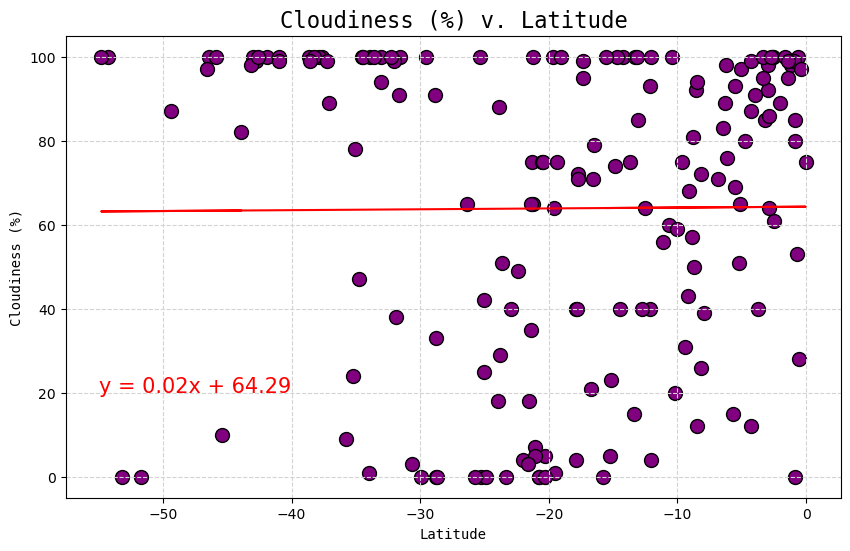

In [93]:
lin_regress(df_south.latitude, df_south.cloudiness, "Latitude", "Cloudiness (%)", -55, 20)

Analysis:
- Similarly to Humidity, there is no linear relationship between Cloudiness and Latitude. This is consistent with previous observations that show cloudiness to be a complex variable dependent on a number of different factors. Those factors include, but are not limited to: altitude and geographic features including large bodies of water.

### Wind Speed v. Latitude Linear Regression Plot

The r-value is: 0.0056484272120353824


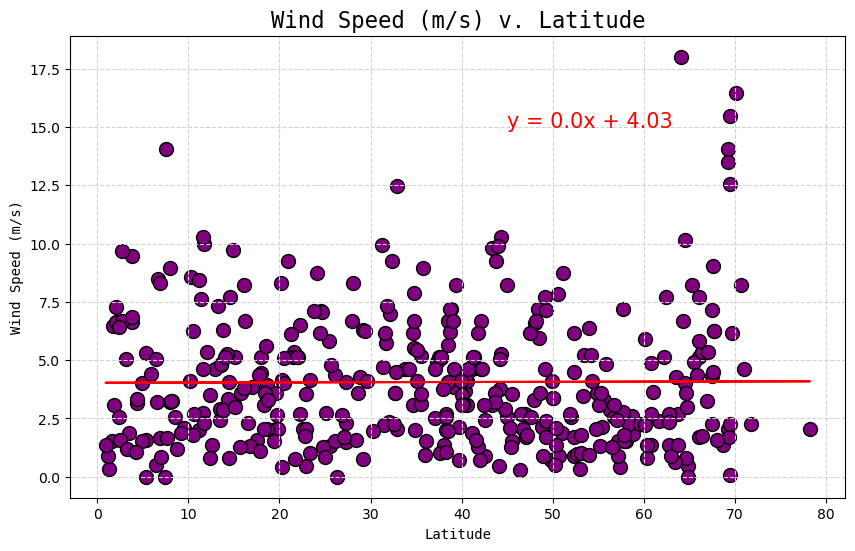

In [95]:
lin_regress(df_north.latitude, df_north.wind_speed, "Latitude", "Wind Speed (m/s)", 45, 15)

The r-value is: -0.07457681921857416


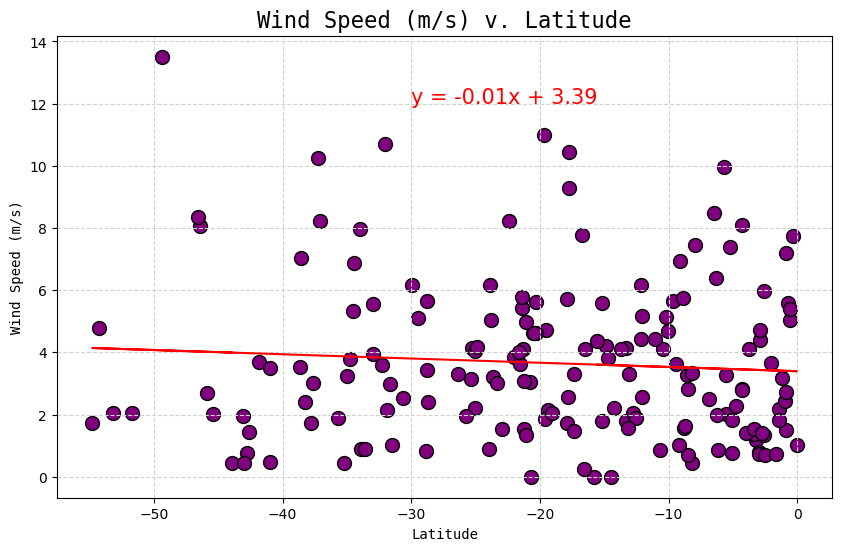

In [97]:
lin_regress(df_south.latitude, df_south.wind_speed, "Latitude", "Wind Speed (m/s)", -30, 12)

Analysis:
- Wind speed and Latitude look to have no linear relationship. In fact, wind speed looks be relatively constant regardless of the latitude.